In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import xlsxwriter
import pylab as py

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times"
})

In [4]:
Data_MC = pd.read_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/jlab12affinity_Harut_data_0.3.xlsx')
Data_MC.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'x', 'z', 'Q2', 'pT', 'target', 'hadron',
       'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff', 'collinearaff',
       'collinearloworderaff', 'collinearhighorderaff', 'matchaff', 'softaff',
       'targetaff', 'unclassifiedaff', 'R0', 'R1', 'R1p', 'R2', 'R3', 'R4',
       'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget', 'yi', 'yf'],
      dtype='object')

In [5]:
Data_MC

,Unnamed: 0.1,Unnamed: 0,x,z,Q2,pT,target,hadron,partonicaff,currentaff,...,R4,R5,qT,xN,zN,yp,yh,yhtarget,yi,yf
0,0,0,0.163209,0.519495,2.187441,0.372743,proton,pi+,0.446,0.529,...,0.902400,0.102698,0.723519,0.161494,0.512584,2.277682,-0.656063,6.250098,1.336844,-0.288923
1,1,1,0.199568,0.344123,2.363906,0.568032,proton,pi+,0.490,0.533,...,0.267040,1.320355,1.648771,0.196689,0.333260,2.119317,0.102215,5.555645,1.306895,0.188915
2,2,2,0.143593,0.510882,2.115279,0.145979,proton,pi+,0.435,0.534,...,1.422809,0.352633,0.288147,0.142380,0.506247,2.386878,-1.298264,6.437130,1.335010,-0.501100
3,3,3,0.169969,0.376156,1.476711,0.237518,proton,pi+,0.296,0.347,...,0.938600,0.063366,0.640114,0.167135,0.367630,2.046889,-0.500376,5.261690,1.138917,-0.134424
4,4,4,0.161929,0.458246,1.731593,0.456901,proton,pi+,0.343,0.453,...,0.600497,0.509998,1.003261,0.159823,0.448611,2.171233,-0.231003,5.792015,1.252345,-0.029593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,1395,0.130813,0.388649,1.805798,0.670364,proton,pi+,0.348,0.484,...,0.274715,1.292020,1.716816,0.129738,0.380076,2.400766,0.271808,6.112288,1.282911,0.343297
1396,1396,1396,0.224520,0.455462,2.081960,0.565936,proton,pi+,0.430,0.497,...,0.456502,0.784162,1.250220,0.219922,0.439030,1.944163,-0.117783,5.416061,1.260965,0.029900
1397,1397,1397,0.101397,0.372449,1.586592,0.397305,proton,pi+,0.288,0.412,...,0.643918,0.440184,1.068974,0.100824,0.368663,2.588195,-0.106874,6.382543,1.295084,0.062857
1398,1398,1398,0.101397,0.526889,1.586592,0.491195,proton,pi+,0.304,0.432,...,0.772039,0.258720,0.934866,0.100824,0.522164,2.588195,-0.261441,6.729687,1.279243,-0.025879


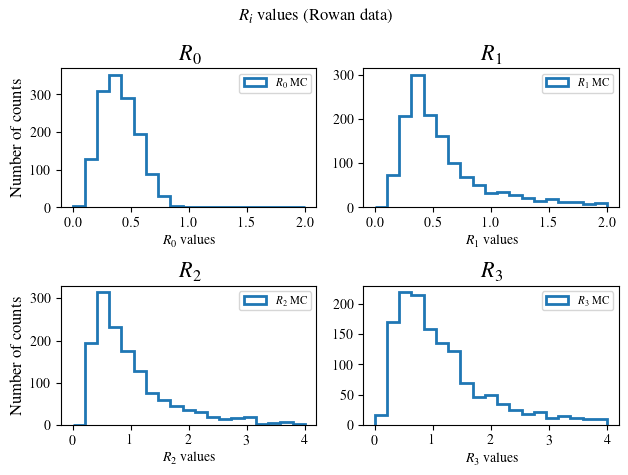

In [25]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Rowan data)')

edges1 = np.linspace(0, 2, 20)

axs[0, 0].hist(Data_MC['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Data_MC['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 4, 20)

axs[1, 0].hist(Data_MC['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 4, 20)

axs[1, 1].hist(Data_MC['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

In [7]:
Data_Harut = pd.read_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/jlab12affinity_Old_0.3.xlsx')
Data_Harut.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'W2', 'pT', 'Q2', 'x', 'z', 'hadron',
       'target', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

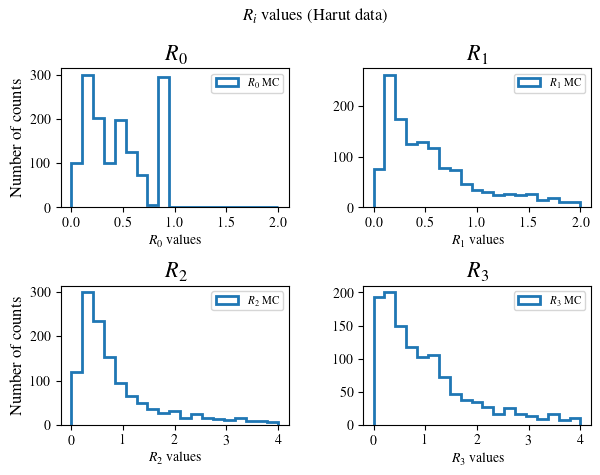

In [26]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Harut data)')

edges1 = np.linspace(0, 2, 20)

axs[0, 0].hist(Data_Harut['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Data_Harut['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 4, 20)

axs[1, 0].hist(Data_Harut['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 4, 20)

axs[1, 1].hist(Data_Harut['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

In [12]:
Data_filter = pd.read_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/jlab12affinity_1400_events0.3.xlsx')
Data_filter.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'W2', 'pT', 'Q2', 'x', 'z', 'hadron',
       'target', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

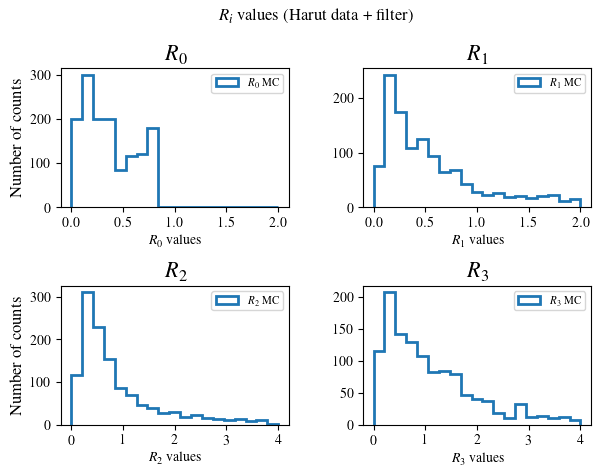

In [27]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Harut data + filter)')

edges1 = np.linspace(0, 2, 20)

axs[0, 0].hist(Data_filter['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Data_filter['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 4, 20)

axs[1, 0].hist(Data_filter['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 4, 20)

axs[1, 1].hist(Data_filter['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

In [19]:
Data_MC_filter = pd.read_excel('/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/CLAS12_1400affinity_1400_events0.3.xlsx')
Data_MC_filter.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'x', 'z', 'Q2', 'pT', 'target', 'hadron',
       'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff', 'collinearaff',
       'collinearloworderaff', 'collinearhighorderaff', 'matchaff', 'softaff',
       'targetaff', 'unclassifiedaff', 'R0', 'R1', 'R1p', 'R2', 'R3', 'R4',
       'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget', 'yi', 'yf'],
      dtype='object')

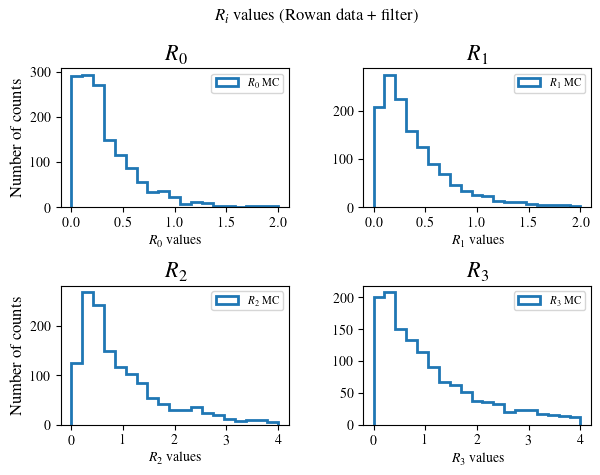

In [28]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Rowan data + filter)')

edges1 = np.linspace(0, 2, 20)

axs[0, 0].hist(Data_MC_filter['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Data_MC_filter['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 4, 20)

axs[1, 0].hist(Data_MC_filter['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 4, 20)

axs[1, 1].hist(Data_MC_filter['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

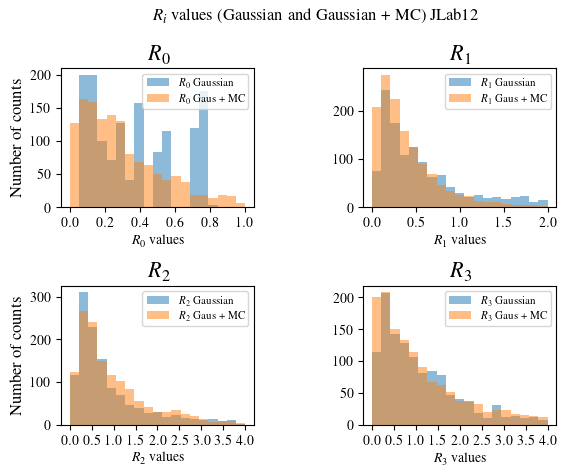

In [22]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian and Gaussian + MC) JLab12')

edges1 = np.linspace(0, 1, 20)

axs[0, 0].hist(Data_filter['R0'], alpha = 0.5, bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[0, 0].hist(Data_MC_filter['R0'], alpha = 0.5, bins = edges1, label=['$R_0$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].set_xticks(np.arange(0, 1.2, step=0.2))
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Data_filter['R1'], alpha = 0.5, bins = edges3, label='$R_1$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[0, 1].hist(Data_MC_filter['R1'], alpha = 0.5, bins = edges3, label=['$R_1$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].set_xticks(np.arange(0, 2.2, step=0.5))
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 4, 20)

axs[1, 0].hist(Data_filter['R2'], alpha = 0.5, bins = edges2, label='$R_2$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[1, 0].hist(Data_MC_filter['R2'], alpha = 0.5, bins = edges2, label=['$R_2$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].set_xticks(np.arange(0, 4.1, step=0.5))
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 4, 20)

axs[1, 1].hist(Data_filter['R3'], alpha = 0.5, bins = edges4, label='$R_3$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[1, 1].hist(Data_MC_filter['R3'], alpha = 0.5, bins = edges4, label=['$R_3$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].set_xticks(np.arange(0, 4.1, step=0.5))
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

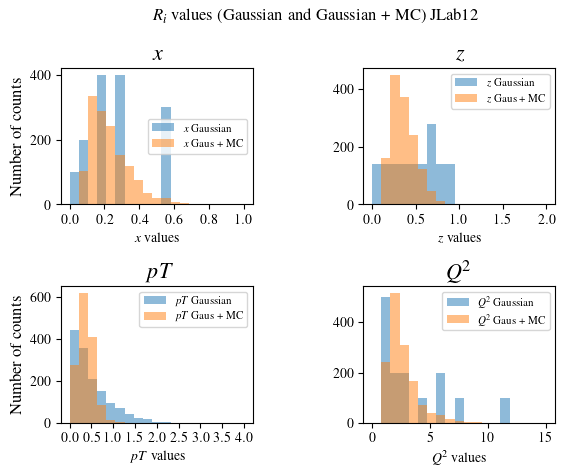

In [32]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian and Gaussian + MC) JLab12')

edges1 = np.linspace(0, 1, 20)

axs[0, 0].hist(Data_filter['x'], alpha = 0.5, bins = edges1, label='$x$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[0, 0].hist(Data_MC_filter['x'], alpha = 0.5, bins = edges1, label=['$x$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 0].set_title("$x$", fontsize=16)
axs[0, 0].set_xlabel('$x$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].set_xticks(np.arange(0, 1.2, step=0.2))
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Data_filter['z'], alpha = 0.5, bins = edges3, label='$z$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[0, 1].hist(Data_MC_filter['z'], alpha = 0.5, bins = edges3, label=['$z$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 1].set_title("$z$", fontsize=16)
axs[0, 1].set_xlabel('$z$ values')
axs[0, 1].set_xticks(np.arange(0, 2.2, step=0.5))
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 4, 20)

axs[1, 0].hist(Data_filter['pT'], alpha = 0.5, bins = edges2, label='$pT$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[1, 0].hist(Data_MC_filter['pT'], alpha = 0.5, bins = edges2, label=['$pT$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 0].set_title("$pT$", fontsize=16)
axs[1, 0].set_xlabel('$pT$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].set_xticks(np.arange(0, 4.1, step=0.5))
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 15, 20)

axs[1, 1].hist(Data_filter['Q2'], alpha = 0.5, bins = edges4, label='$Q^2$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[1, 1].hist(Data_MC_filter['Q2'], alpha = 0.5, bins = edges4, label=['$Q^2$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 1].set_title("$Q^2$", fontsize=16)
axs[1, 1].set_xlabel('$Q^2$ values')
# axs[1, 1].set_xticks(np.arange(0, 15, step=0.5))
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

# _________________________________________________________________________

In [128]:
Data_Gaus = pd.read_csv('/Users/tetiana/Documents/Affinity/Affinity_random_values/R_out_Gaus.csv')
Data_Gaus.keys()

Index(['Unnamed: 0', 'R0', 'R1', 'R2', 'R3', 'R2_calc', 'xi', 'zeta', 'k_i',
       'x', 'z', 'Q2', 'theta_H', 'theta_deltak', 'theta_ki'],
      dtype='object')

In [129]:
print('Gaus data:', len(Data_Gaus), '\nMC data:', len(Data_MC))

Gaus data: 1000 
MC data: 1000


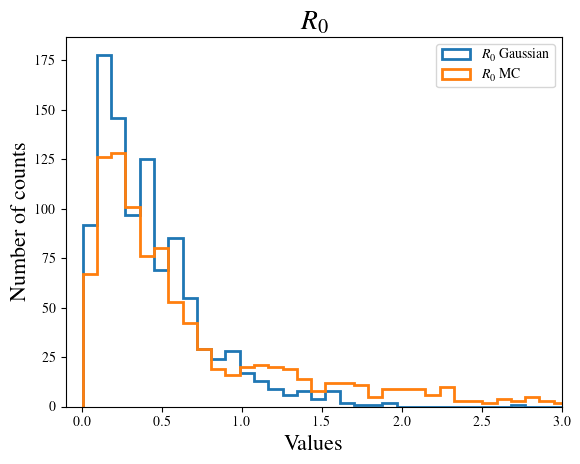

In [8]:
a = Data_Gaus['R0']                   # A uniform distribution
c = Data_MC['R0']
edges = np.histogram(np.hstack((a,c)), bins=100)[1] # Get the bin edges

plt.hist(Data_Gaus['R0'], bins = edges, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
plt.hist(Data_MC['R0'], bins = edges, label='$R_0$ MC', linewidth=2, histtype='step', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_0$', fontsize=20)
plt.xlim((-0.1,3))
 
# Adding legend
plt.legend()

py.savefig('./Figs/R0_val_MC_VS_Gaus.pdf')

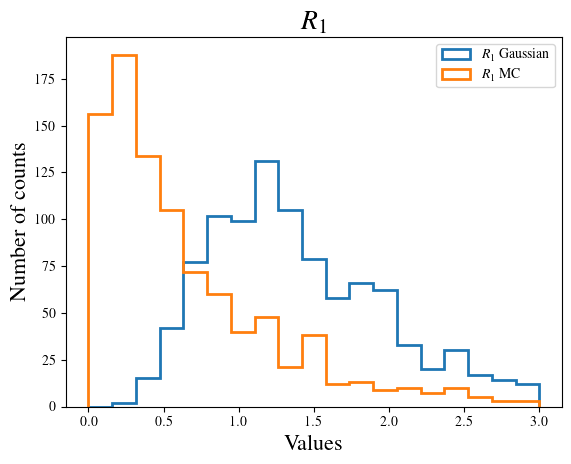

In [12]:
edges = np.linspace(0, 3, 20)

plt.hist(Data_Gaus['R1'], bins = edges, label='$R_1$ Gaussian', linewidth=2, histtype='step', density=False)
plt.hist(Data_MC['R1'], bins = edges, label='$R_1$ MC', linewidth=2, histtype='step', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_1$', fontsize=20)
 
# Adding legend
plt.legend()

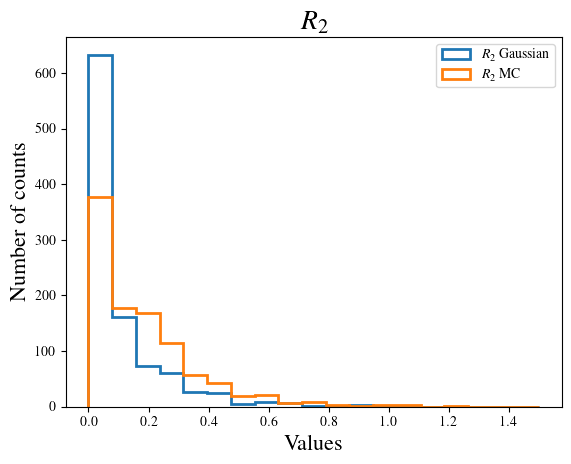

In [21]:
edges = np.linspace(0, 1.5, 20)

plt.hist(Data_Gaus['R2_calc'], bins = edges, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
plt.hist(Data_MC['R2'], bins = edges, label='$R_2$ MC', linewidth=2, histtype='step', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_2$', fontsize=20)
 
# Adding legend
plt.legend()

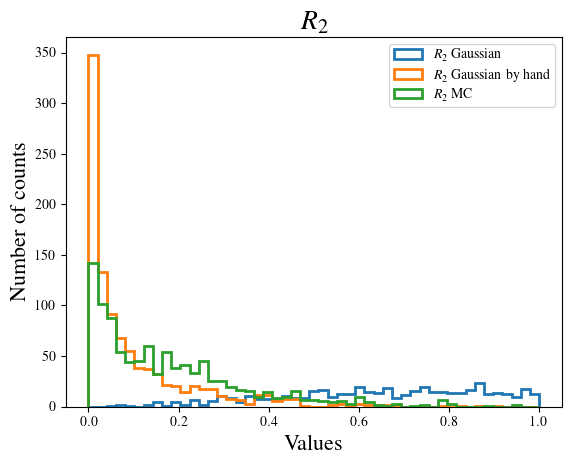

In [9]:
edges = np.linspace(0, 1, 50)

plt.hist(Data_Gaus['R2'], bins = edges, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
plt.hist(Data_Gaus['R2_calc'], bins = edges, label='$R_2$ Gaussian by hand', linewidth=2, histtype='step', density=False)
plt.hist(Data_MC['R2'], bins = edges, label='$R_2$ MC', linewidth=2, histtype='step', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_2$', fontsize=20)
 
# Adding legend
plt.legend()

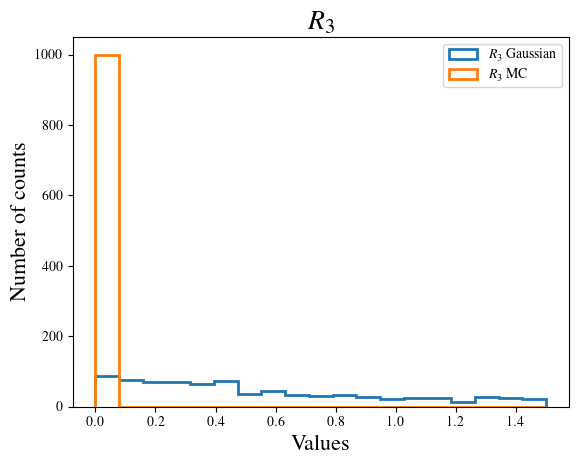

In [18]:
edges = np.linspace(0, 1.5, 20)

plt.hist(Data_Gaus['R3'], bins = edges, label='$R_3$ Gaussian', linewidth=2, histtype='step', density=False)
plt.hist(Data_MC['R3'], bins = edges, label='$R_3$ MC', linewidth=2, histtype='step', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_3$', fontsize=20)
 
# Adding legend
plt.legend()

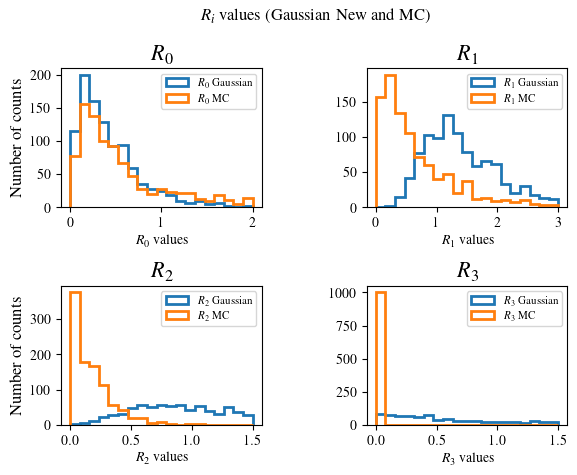

In [25]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian New and MC)')

edges1 = np.linspace(0, 2, 20)

axs[0, 0].hist(Data_Gaus['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 0].hist(Data_MC['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 3, 20)

axs[0, 1].hist(Data_Gaus['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 1].hist(Data_MC['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 1.5, 20)

axs[1, 0].hist(Data_Gaus['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 0].hist(Data_MC['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 1.5, 20)

axs[1, 1].hist(Data_Gaus['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 1].hist(Data_MC['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

py.savefig('./Figs/R_val_Random.pdf')

In [26]:
k = 0
n = 0

for i in range(0, len(Data_MC['R2'])):
    if (Data_MC['R2'][i] < 0.3):
        k+=1
    if (Data_Gaus['R2'][i] < 0.3):
        n+=1

print('MC_R2 < 0.3 =', k, '         ', 'Gaus_R2 < 0.3 =', n)

MC_R2 < 0.3 = 818           Gaus_R2 < 0.3 = 37


# Kinematical variables

In [27]:
MC = pd.read_csv('/Users/tetiana/Documents/Affinity/Affinity_CLAS12_values/CLAS12_all_values_1k.csv')
MC.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'M_ki', 'M_kf', 'delta_k_t', 'ki_t', 'xi',
       'zeta', 'theta_ki', 'theta_H', 'theta_deltak', 'M', 'M_h', 'x', 'z',
       'Q', 'T_t'],
      dtype='object')

In [28]:
Gaus = pd.read_excel('/Users/tetiana/Documents/Affinity/expdata/JLab22_pi0.xlsx')
Gaus.keys()

Index(['Unnamed: 0', 'Bin', 'sec', 'nQ2', 'nx', 'nz', 'npT', 'avQ2', 'avx',
       'avz', 'avpT', 'avy', 'N_events', 'N_unp', 'N_helicity', 'bin_c_Q2',
       'bin_c_x', 'bin_c_z', 'bin_c_pT', 'Q2', 'pT', 'x', 'y', 'z', 'target',
       'hadron'],
      dtype='object')

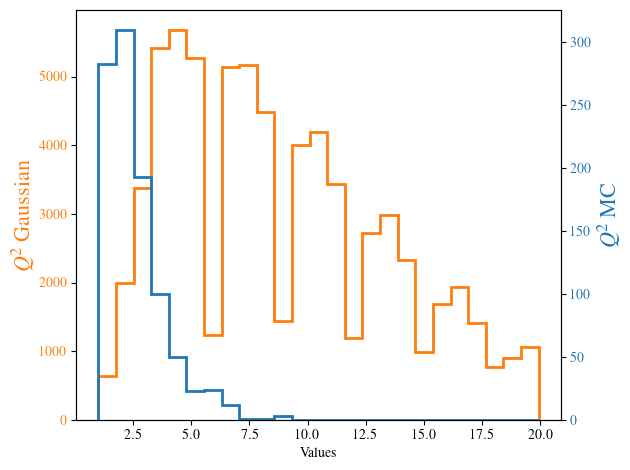

In [63]:
a = Gaus['Q2']                   # A uniform distribution
b = MC['Q']**2
edges = np.histogram(np.hstack((a,b)), bins=25)[1] # Get the bin edges

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Values')
ax1.set_ylabel('$Q^2$ Gaussian', color=color, fontsize=16)
ax1.hist(Gaus['Q2'], bins = edges, label='$Q^2$ Gaussian', color=color, linewidth=2, histtype='step', density=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$Q^2$ MC', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.hist(MC['Q']**2, bins = edges, label='$Q^2$ MC', color=color, linewidth=2, histtype='step', density=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

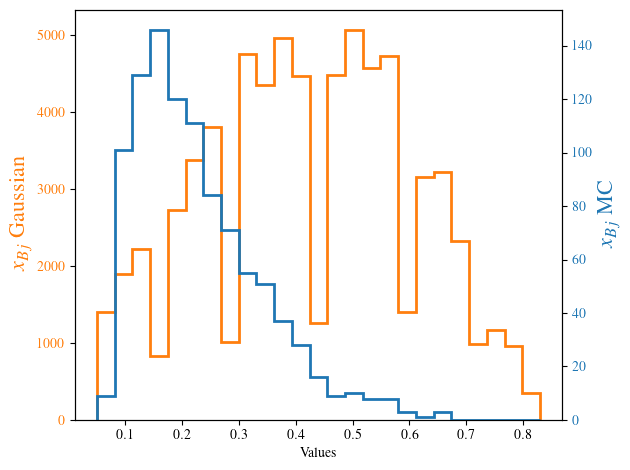

In [61]:
a = Gaus['x']                   # A uniform distribution
b = MC['x']
edges = np.histogram(np.hstack((a,b)), bins=25)[1] # Get the bin edges

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Values')
ax1.set_ylabel('$x_{Bj}$ Gaussian', color=color, fontsize=16)
ax1.hist(Gaus['x'], bins = edges, label='$x_{Bj}$ Gaussian', color=color, linewidth=2, histtype='step', density=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$x_{Bj}$ MC', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.hist(MC['x'], bins = edges, label='$x_{Bj}$ MC', color=color, linewidth=2, histtype='step', density=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.legend()
plt.show()

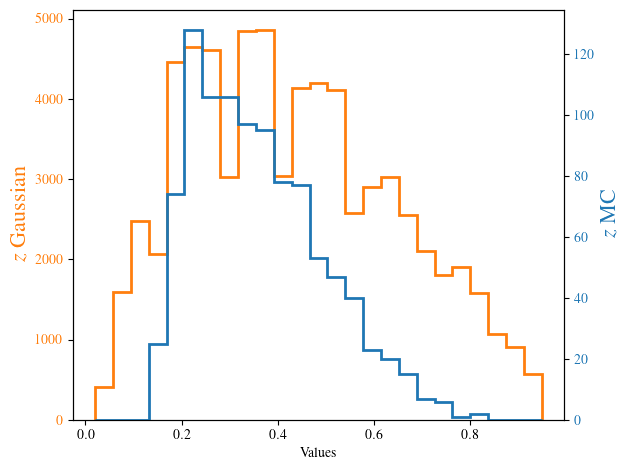

In [64]:
a = Gaus['z']                   # A uniform distribution
b = MC['z']
edges = np.histogram(np.hstack((a,b)), bins=25)[1] # Get the bin edges

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Values')
ax1.set_ylabel('$z$ Gaussian', color=color, fontsize=16)
ax1.hist(Gaus['z'], bins = edges, label='$z$ Gaussian', color=color, linewidth=2, histtype='step', density=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$z$ MC', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.hist(MC['z'], bins = edges, label='$z$ MC', color=color, linewidth=2, histtype='step', density=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.legend()
plt.show()

# JLAB 12

In [84]:
MC = pd.read_csv('/Users/tetiana/Documents/Affinity/Affinity_CLAS12_values/R_out_JLab12.csv')
MC.keys()

Index(['Unnamed: 0', 'R0', 'R1', 'R2', 'R3', 'xi', 'zeta', 'k_i', 'x', 'z',
       'Q2', 'theta_H', 'theta_deltak', 'theta_ki'],
      dtype='object')

In [85]:
Gaus = pd.read_csv('/Users/tetiana/Documents/Affinity/Affinity_random_values/R_out_Gaus_JLab12.csv')
Gaus.keys()

Index(['Unnamed: 0', 'R0', 'R1', 'R2', 'R3', 'R2_calc', 'xi', 'zeta', 'k_i',
       'x', 'z', 'Q2', 'theta_H', 'theta_deltak', 'theta_ki'],
      dtype='object')

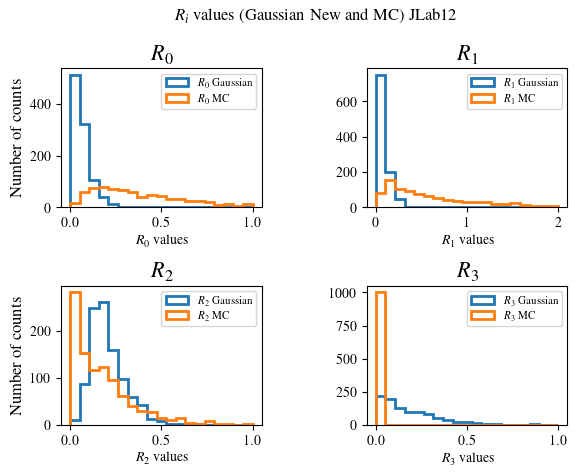

In [86]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian New and MC) JLab12')

edges1 = np.linspace(0, 1, 20)

axs[0, 0].hist(Gaus['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 0].hist(MC['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Gaus['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 1].hist(MC['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 1, 20)

axs[1, 0].hist(Gaus['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 0].hist(MC['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 1, 20)

axs[1, 1].hist(Gaus['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 1].hist(MC['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

py.savefig('./Figs/R_val_Random_JLab12.pdf')

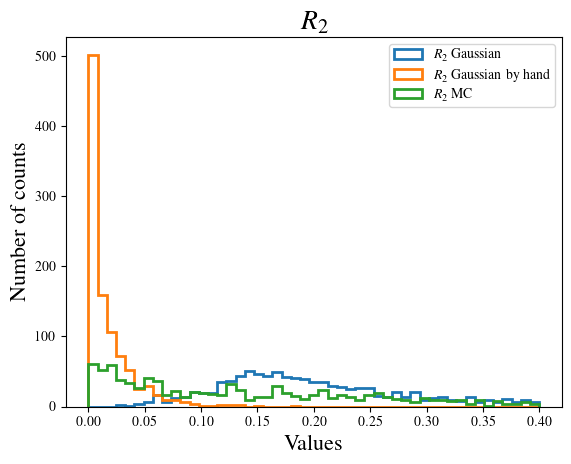

In [92]:
edges = np.linspace(0, 0.4, 50)

plt.hist(Gaus['R2'], bins = edges, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
plt.hist(Gaus['R2_calc'], bins = edges, label='$R_2$ Gaussian by hand', linewidth=2, histtype='step', density=False)
plt.hist(MC['R2'], bins = edges, label='$R_2$ MC', linewidth=2, histtype='step', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_2$', fontsize=20)
 
# Adding legend
plt.legend()

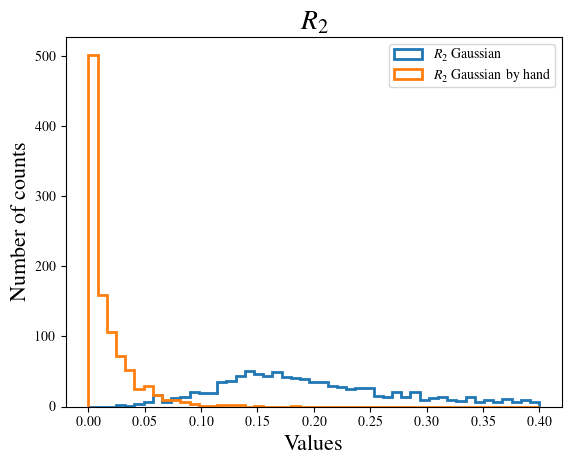

In [93]:
edges = np.linspace(0, 0.4, 50)

plt.hist(Gaus['R2'], bins = edges, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
plt.hist(Gaus['R2_calc'], bins = edges, label='$R_2$ Gaussian by hand', linewidth=2, histtype='step', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_2$', fontsize=20)
 
# Adding legend
plt.legend()

# R values for NEW/OLD MC

In [165]:
MC_Gaus = pd.read_excel('/Users/tetiana/Documents/Affinity/Affinity_Clas12_values/data/CLAS12_Mki_Mkf_deltakt_kit_w_all_1400affinity_100k_events0.3.xlsx')
MC_Gaus.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'M_ki', 'M_kf',
       'delta_k_t', 'ki_t', 'xi', 'zeta', 'theta_ki', 'theta_H',
       'theta_deltak', 'M', 'M_h', 'x', 'z', 'Q', 'Q2', 'T_t', 'pT', 'target',
       'hadron', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

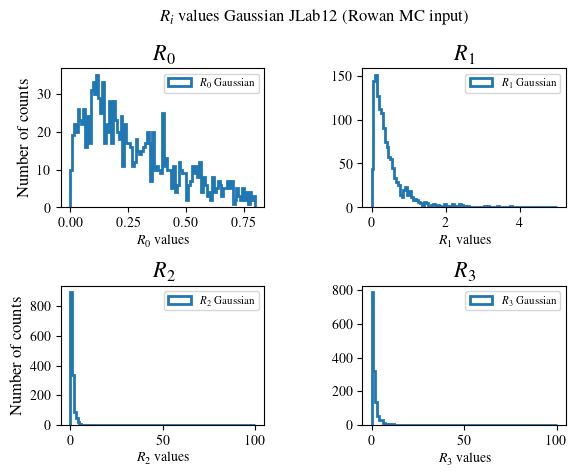

In [166]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values Gaussian JLab12 (Rowan MC input)')

edges1 = np.linspace(0, 0.8, 100)

axs[0, 0].hist(MC_Gaus['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 5, 100)

axs[0, 1].hist(MC_Gaus['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 100, 100)

axs[1, 0].hist(MC_Gaus['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 100, 100)

axs[1, 1].hist(MC_Gaus['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

In [168]:
Gaus_out = pd.read_excel('/Users/tetiana/Documents/Affinity/Affinity_random_values/data/jlab12affinity_1400_events0.3.xlsx')
Gaus_out.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'W2', 'pT', 'Q2', 'x', 'z', 'hadron',
       'target', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

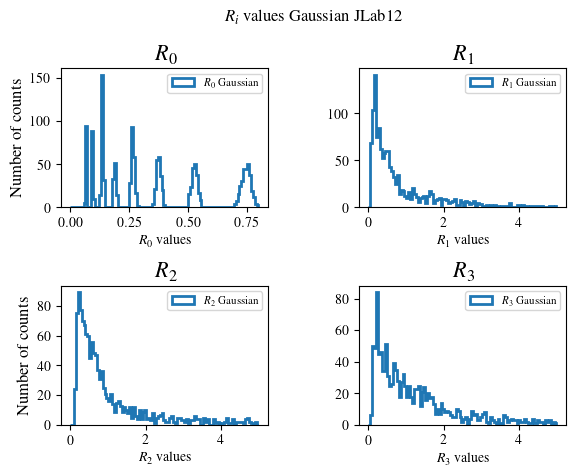

In [169]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values Gaussian JLab12')

edges1 = np.linspace(0, 0.8, 100)

axs[0, 0].hist(Gaus_out['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 5, 100)

axs[0, 1].hist(Gaus_out['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 5, 100)

axs[1, 0].hist(Gaus_out['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 5, 100)

axs[1, 1].hist(Gaus_out['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

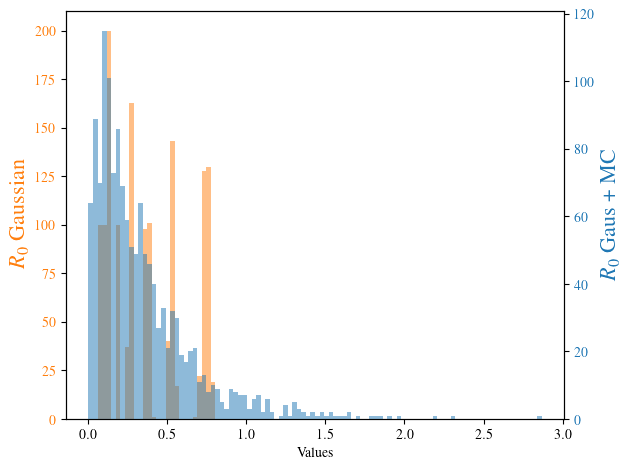

In [178]:
a = Gaus_out['R0']                   # A uniform distribution
b = MC_Gaus['R0']
edges = np.histogram(np.hstack((a,b)), bins=100)[1] # Get the bin edges

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Values')
ax1.set_ylabel('$R_0$ Gaussian', color=color, fontsize=16)
ax1.hist(Gaus_out['R0'], alpha = 0.5, bins = edges, label='$R_0$ Gaussian', color=color, linewidth=2, histtype='stepfilled', density=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$R_0$ Gaus + MC', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.hist(MC_Gaus['R0'], alpha = 0.5, bins = edges, label='$R_0$ MC', color=color, linewidth=2, histtype='stepfilled', density=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.legend()
plt.show()

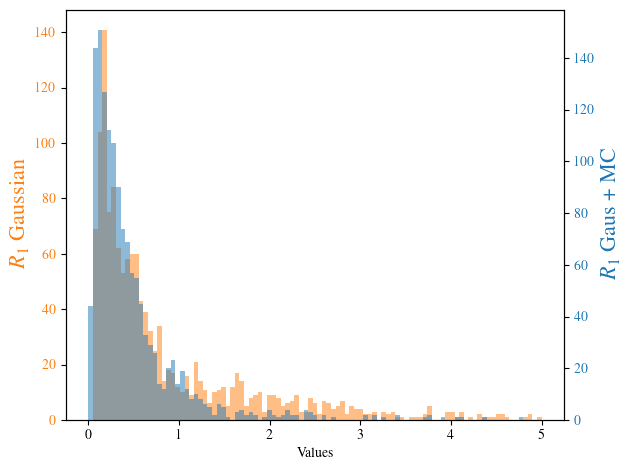

In [179]:
edges = np.linspace(0, 5, 100) # Get the bin edges

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Values')
ax1.set_ylabel('$R_1$ Gaussian', color=color, fontsize=16)
ax1.hist(Gaus_out['R1'], alpha = 0.5, bins = edges, label='$R_1$ Gaussian', color=color, linewidth=2, histtype='stepfilled', density=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$R_1$ Gaus + MC', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.hist(MC_Gaus['R1'], alpha = 0.5, bins = edges, label='$R_1$ MC', color=color, linewidth=2, histtype='stepfilled', density=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.legend()
plt.show()

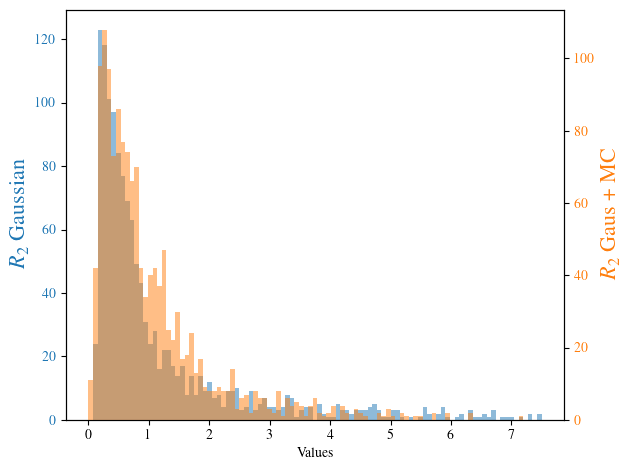

In [180]:
edges = np.linspace(0, 7.5, 100)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Values')
ax1.set_ylabel('$R_2$ Gaussian', color=color, fontsize=16)
ax1.hist(Gaus_out['R2'], alpha = 0.5, bins = edges, label='$R_2$ Gaussian', color=color, linewidth=2, histtype='stepfilled', density=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('$R_2$ Gaus + MC', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.hist(MC_Gaus['R2'], alpha = 0.5, bins = edges, label='$R_2$ MC', color=color, linewidth=2, histtype='stepfilled', density=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.legend()
plt.show()

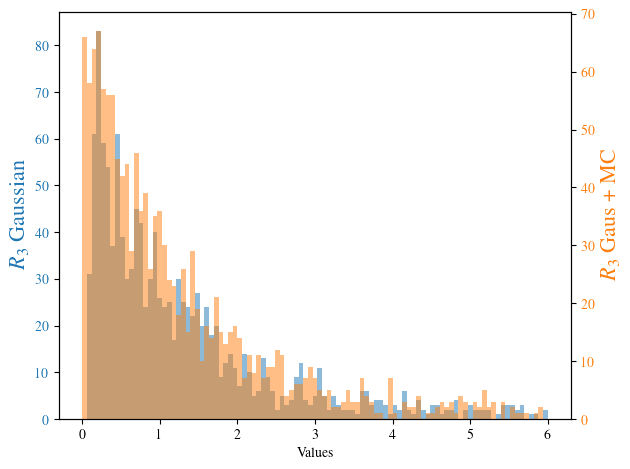

In [181]:
edges = np.linspace(0, 6, 100)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Values')
ax1.set_ylabel('$R_3$ Gaussian', color=color, fontsize=16)
ax1.hist(Gaus_out['R3'], alpha = 0.5, bins = edges, label='$R_3$ Gaussian', color=color, linewidth=2, histtype='stepfilled', density=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('$R_3$ Gaus + MC', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.hist(MC_Gaus['R3'], alpha = 0.5, bins = edges, label='$R_3$ MC', color=color, linewidth=2, histtype='stepfilled', density=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.legend()
plt.show()

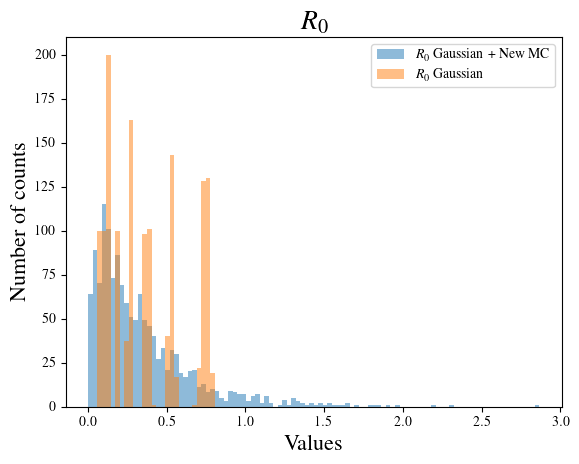

In [185]:
a = MC_Gaus['R0']                   # A uniform distribution
c = Gaus_out['R0']
edges = np.histogram(np.hstack((a,c)), bins=100)[1] # Get the bin edges

plt.hist(MC_Gaus['R0'], alpha = 0.5, bins = edges, label='$R_0$ Gaussian + New MC', linewidth=2, histtype='stepfilled', density=False)
plt.hist(Gaus_out['R0'], alpha = 0.5, bins = edges, label='$R_0$ Gaussian', linewidth=2, histtype='stepfilled', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_0$', fontsize=20)
# plt.xlim((0.0,0.7))
 
# Adding legend
plt.legend()
# py.savefig('./Figs/Q2.png')

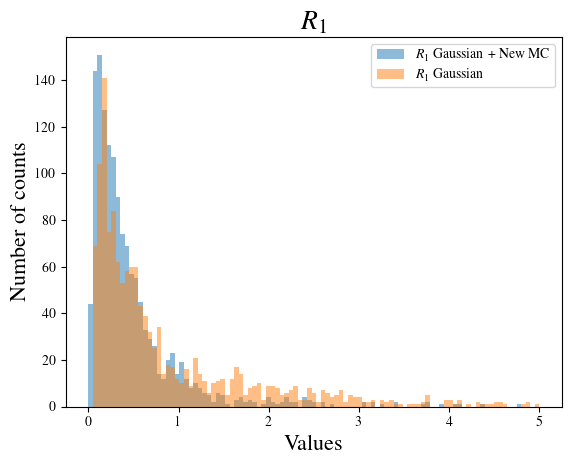

In [187]:
edges = np.linspace(0, 5, 100)

plt.hist(MC_Gaus['R1'], alpha = 0.5, bins = edges, label='$R_1$ Gaussian + New MC', linewidth=2, histtype='stepfilled', density=False)
plt.hist(Gaus_out['R1'], alpha = 0.5, bins = edges, label='$R_1$ Gaussian', linewidth=2, histtype='stepfilled', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_1$', fontsize=20)
# plt.xlim((0.0,0.7))
 
# Adding legend
plt.legend()

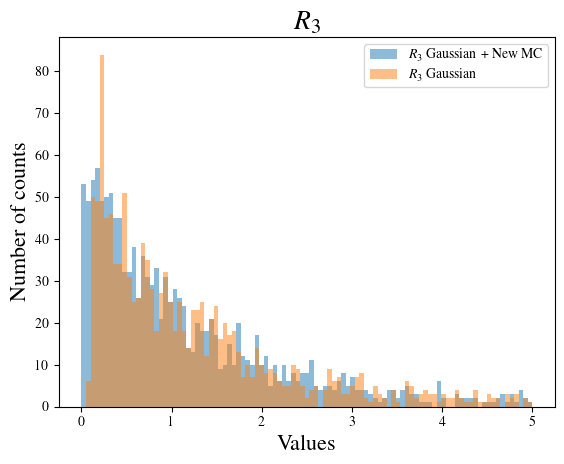

In [190]:
edges = np.linspace(0, 5, 100)

plt.hist(MC_Gaus['R3'], alpha = 0.5, bins = edges, label='$R_3$ Gaussian + New MC', linewidth=2, histtype='stepfilled', density=False)
plt.hist(Gaus_out['R3'], alpha = 0.5, bins = edges, label='$R_3$ Gaussian', linewidth=2, histtype='stepfilled', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_3$', fontsize=20)
# plt.xlim((0.0,0.7))
 
# Adding legend
plt.legend()

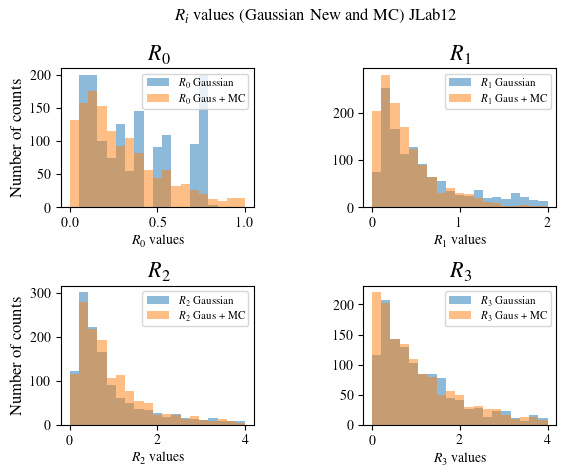

In [196]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian New and MC) JLab12')

edges1 = np.linspace(0, 1, 20)

axs[0, 0].hist(Gaus_out['R0'], alpha = 0.5, bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[0, 0].hist(MC_Gaus['R0'], alpha = 0.5, bins = edges1, label=['$R_0$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Gaus_out['R1'], alpha = 0.5, bins = edges3, label='$R_1$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[0, 1].hist(MC_Gaus['R1'], alpha = 0.5, bins = edges3, label=['$R_1$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 4, 20)

axs[1, 0].hist(Gaus_out['R2'], alpha = 0.5, bins = edges2, label='$R_2$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[1, 0].hist(MC_Gaus['R2'], alpha = 0.5, bins = edges2, label=['$R_2$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 4, 20)

axs[1, 1].hist(Gaus_out['R3'], alpha = 0.5, bins = edges4, label='$R_3$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[1, 1].hist(MC_Gaus['R3'], alpha = 0.5, bins = edges4, label=['$R_3$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

# Double check

In [225]:
MC_G = pd.read_excel('/Users/tetiana/Documents/Affinity/Affinity_Clas12_values/data/CLAS12_Mki_Mkf_deltakt_kit_w_all_1400affinity_Old_0.3.xlsx')
MC_G.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'M_ki', 'M_kf',
       'delta_k_t', 'ki_t', 'xi', 'zeta', 'theta_ki', 'theta_H',
       'theta_deltak', 'M', 'M_h', 'x', 'z', 'Q', 'Q2', 'qT', 'pT', 'target',
       'hadron', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'xN', 'zN', 'yp', 'yh', 'yhtarget', 'yi',
       'yf'],
      dtype='object')

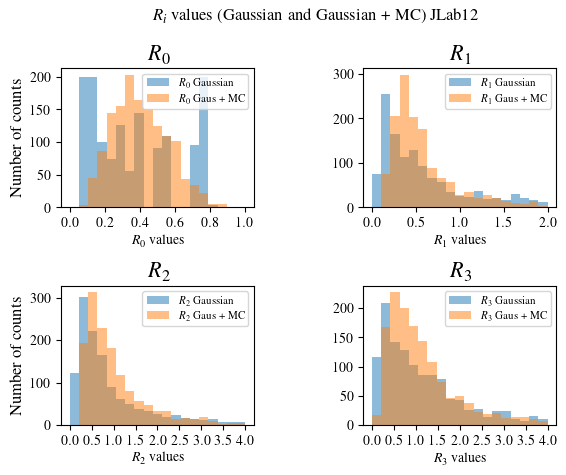

In [226]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian and Gaussian + MC) JLab12')

edges1 = np.linspace(0, 1, 20)

axs[0, 0].hist(Gaus_out['R0'], alpha = 0.5, bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[0, 0].hist(MC_G['R0'], alpha = 0.5, bins = edges1, label=['$R_0$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].set_xticks(np.arange(0, 1.2, step=0.2))
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Gaus_out['R1'], alpha = 0.5, bins = edges3, label='$R_1$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[0, 1].hist(MC_G['R1'], alpha = 0.5, bins = edges3, label=['$R_1$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].set_xticks(np.arange(0, 2.2, step=0.5))
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 4, 20)

axs[1, 0].hist(Gaus_out['R2'], alpha = 0.5, bins = edges2, label='$R_2$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[1, 0].hist(MC_G['R2'], alpha = 0.5, bins = edges2, label=['$R_2$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].set_xticks(np.arange(0, 4.1, step=0.5))
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 4, 20)

axs[1, 1].hist(Gaus_out['R3'], alpha = 0.5, bins = edges4, label='$R_3$ Gaussian', linewidth=2, histtype='stepfilled', density=False)
axs[1, 1].hist(MC_G['R3'], alpha = 0.5, bins = edges4, label=['$R_3$ Gaus + MC'], linewidth=2, histtype='stepfilled', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].set_xticks(np.arange(0, 4.1, step=0.5))
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

# ________________________________________________________________________

In [88]:
Gaus1 = pd.read_csv('/Users/tetiana/Documents/Affinity/Affinity_random_values/R_out_Gaus_JLab12.csv')
Gaus.keys()

Index(['Unnamed: 0', 'R0', 'R1', 'R2', 'R3', 'R2_calc', 'xi', 'zeta', 'k_i',
       'x', 'z', 'Q2', 'theta_H', 'theta_deltak', 'theta_ki'],
      dtype='object')

In [89]:
print('Gaus data:', len(Gaus), '\nMC data:', len(MC))

Gaus data: 1000 
MC data: 1000


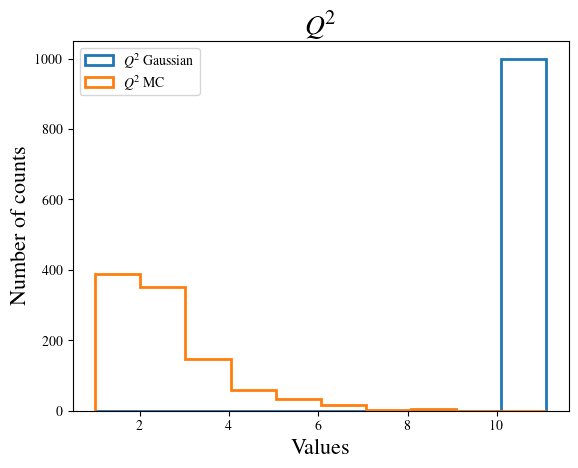

In [110]:
a = Gaus['Q2']                   # A uniform distribution
c = MC['Q2']
edges = np.histogram(np.hstack((a,c)), bins=10)[1] # Get the bin edges

plt.hist(Gaus['Q2'], bins = edges, label='$Q^2$ Gaussian', linewidth=2, histtype='step', density=False)
plt.hist(MC['Q2'], bins = edges, label='$Q^2$ MC', linewidth=2, histtype='step', density=False)


# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$Q^2$', fontsize=20)
# plt.xlim((0.0,0.7))
 
# Adding legend
plt.legend()
py.savefig('./Figs/Q2.png')

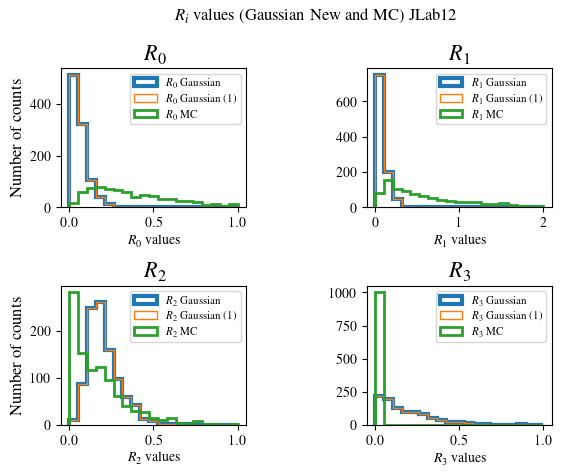

In [76]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian New and MC) JLab12')

edges1 = np.linspace(0, 1, 20)

axs[0, 0].hist(Gaus['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=3, histtype='step', density=False)
axs[0, 0].hist(Gaus1['R0'], bins = edges1, label='$R_0$ Gaussian (1)', linewidth=1, histtype='step', density=False)
axs[0, 0].hist(MC['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 2, 20)

axs[0, 1].hist(Gaus['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=3, histtype='step', density=False)
axs[0, 1].hist(Gaus1['R1'], bins = edges3, label='$R_1$ Gaussian (1)', linewidth=1, histtype='step', density=False)
axs[0, 1].hist(MC['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 1, 20)

axs[1, 0].hist(Gaus['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=3, histtype='step', density=False)
axs[1, 0].hist(Gaus1['R2'], bins = edges2, label='$R_2$ Gaussian (1)', linewidth=1, histtype='step', density=False)
axs[1, 0].hist(MC['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 1, 20)

axs[1, 1].hist(Gaus['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=3, histtype='step', density=False)
axs[1, 1].hist(Gaus1['R3'], bins = edges4, label='$R_3$ Gaussian (1)', linewidth=1, histtype='step', density=False)
axs[1, 1].hist(MC['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

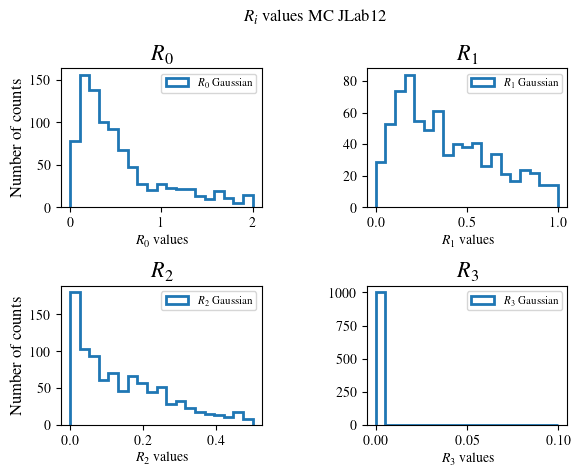

In [83]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values MC JLab12')

edges1 = np.linspace(0, 2, 20)

axs[0, 0].hist(MC['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges3 = np.linspace(0, 1, 20)

axs[0, 1].hist(MC['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges2 = np.linspace(0, 0.5, 20)

axs[1, 0].hist(MC['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges4 = np.linspace(0, 0.1, 20)

axs[1, 1].hist(MC['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=2, histtype='step', density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

# JLAB 12 input data

In [111]:
MC_inp = pd.read_csv('/Users/tetiana/Documents/Affinity/Affinity_CLAS12_values/CLAS12_all_values_1k.csv')
MC_inp.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'M_ki', 'M_kf', 'delta_k_t', 'ki_t', 'xi',
       'zeta', 'theta_ki', 'theta_H', 'theta_deltak', 'M', 'M_h', 'x', 'z',
       'Q', 'T_t'],
      dtype='object')

In [113]:
Gaus_inp = pd.read_excel('/Users/tetiana/Documents/Affinity/expdata/jlab12.xlsx')
Gaus_inp.keys()

Index(['Unnamed: 0', 'W2', 'pT', 'Q2', 'x', 'z', 'hadron', 'target'], dtype='object')

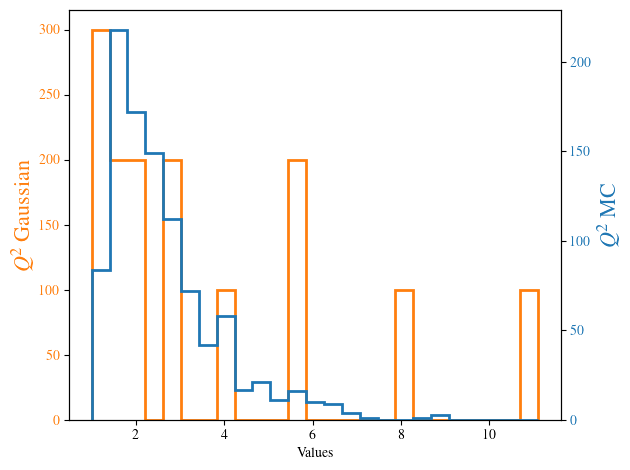

In [121]:
a = Gaus_inp['Q2']                   # A uniform distribution
b = MC_inp['Q']**2
edges = np.histogram(np.hstack((a,b)), bins=25)[1] # Get the bin edges

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Values')
ax1.set_ylabel('$Q^2$ Gaussian', color=color, fontsize=16)
ax1.hist(Gaus_inp['Q2'], bins = edges, label='$Q^2$ Gaussian', color=color, linewidth=2, histtype='step', density=False)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$Q^2$ MC', color=color, fontsize=16)  # we already handled the x-label with ax1
ax2.hist(MC_inp['Q']**2, bins = edges, label='$Q^2$ MC', color=color, linewidth=2, histtype='step', density=False)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.legend()
plt.show()